In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("crop_data.csv")

In [3]:
df.head()

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        2200 non-null   object 
 1   SOIL_TYPE    2200 non-null   object 
 2   N_SOIL       2200 non-null   int64  
 3   P_SOIL       2200 non-null   int64  
 4   K_SOIL       2200 non-null   int64  
 5   TEMPERATURE  2200 non-null   float64
 6   HUMIDITY     2200 non-null   float64
 7   ph           2200 non-null   float64
 8   RAINFALL     2200 non-null   float64
 9   CROP_PRICE   2200 non-null   int64  
 10  CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 189.2+ KB


In [5]:
df.columns

Index(['STATE', 'SOIL_TYPE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE',
       'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [6]:
df=df.drop('CROP_PRICE',axis=1)

In [7]:
## getting all different of features
num_features= [feature for feature in df.columns if df[feature].dtype!='O']
print('Num of numerical features:',len(num_features))
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical features:',len(cat_features))
discreate_features=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print('Num of discreate featuresL:',len(discreate_features))
continuous_features=[feature for feature in num_features if feature not in discreate_features]
print('Num of continuous featuresL:',len(continuous_features))

Num of numerical features: 7
Num of categorical features: 3
Num of discreate featuresL: 0
Num of continuous featuresL: 7


In [8]:
from sklearn.model_selection import train_test_split
x=df.drop(['CROP'],axis=1)
y=df['CROP']

In [9]:
y.unique()

array(['Amaranthus', 'Green Banana', 'Ladies Finger', 'Bitter Gourd',
       'Black pepper', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Carrot',
       'Cauliflower', 'Cluster beans', 'Coconut', 'Colacasia', 'Onion',
       'Potato', 'Tomato', 'Bengal Gram', 'Jowar', 'Paddy', 'Lentil',
       'Rice', 'Cucumber', 'Field Pea', 'French Beans', 'Green Chilli',
       'Knool Khol', 'Pumpkin', 'Raddish', 'Black Gram', 'Green Gram',
       'Jute', 'Maida Atta', 'Mustard', 'Wheat Atta', 'Garlic',
       'Masur Dal', 'Ridge Gourd', 'Arecanut', 'Red Gram', 'Maize',
       'Dry Chillies', 'Groundnut', 'Capsicum', 'Guar', 'Lemon', 'Bajra',
       'Castor Seed', 'Coriander', 'Cowpea', 'Drumstick', 'Elephat Yam',
       'Ginger', 'Seam', 'Methi Leaves', 'Green Onion', 'Peas cod',
       'Pigeon Pea', 'Sponge Gourd', 'Surat Beans', 'Sweet Potato',
       'Tinda', 'Cluster Beans', 'Cotton', 'Wheat', 'Chholia',
       'Little Gourd', 'Round gourd', 'Leafy Vegetable', 'Mint', 'Papaya',
       'Spinach', 'Pa

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# If you want to see the mapping
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

# Display the encoded labels
print("Encoded Labels:", y_encoded)

Label Mapping: {'Amaranthus': 0, 'Amla': 1, 'Amphophalus': 2, 'Apple': 3, 'Arecanut': 4, 'Ash Gourd': 5, 'Bajra': 6, 'Banana': 7, 'Barley': 8, 'Beans': 9, 'Beetroot': 10, 'Bengal Gram': 11, 'Betal Leaves': 12, 'Bitter Gourd': 13, 'Black Gram': 14, 'Black pepper': 15, 'Bottle Gourd': 16, 'Brinjal': 17, 'Broken Rice': 18, 'Cabbage': 19, 'Capsicum': 20, 'Carrot': 21, 'Cashewnuts': 22, 'Castor Seed': 23, 'Cauliflower': 24, 'Chana Dal': 25, 'Chholia': 26, 'Chilly Capsicum': 27, 'Cluster Beans': 28, 'Cluster beans': 29, 'Coconut': 30, 'Coconut Oil': 31, 'Coconut Seed': 32, 'Colacasia': 33, 'Copra': 34, 'Coriander': 35, 'Corriander seed': 36, 'Cotton': 37, 'Cowpea': 38, 'Cucumber': 39, 'Cumbu': 40, 'Drumstick': 41, 'Dry Chillies': 42, 'Duster Beans': 43, 'Elephat Yam': 44, 'Field Pea': 45, 'Fish': 46, 'French Beans': 47, 'Garlic': 48, 'Ghee': 49, 'Gingelly Oil': 50, 'Ginger': 51, 'Grapes': 52, 'Green Avare': 53, 'Green Banana': 54, 'Green Chilli': 55, 'Green Gram': 56, 'Green Onion': 57, 'Gre

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        2200 non-null   object 
 1   SOIL_TYPE    2200 non-null   object 
 2   N_SOIL       2200 non-null   int64  
 3   P_SOIL       2200 non-null   int64  
 4   K_SOIL       2200 non-null   int64  
 5   TEMPERATURE  2200 non-null   float64
 6   HUMIDITY     2200 non-null   float64
 7   ph           2200 non-null   float64
 8   RAINFALL     2200 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


In [12]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.25,random_state=42)

<AxesSubplot:>

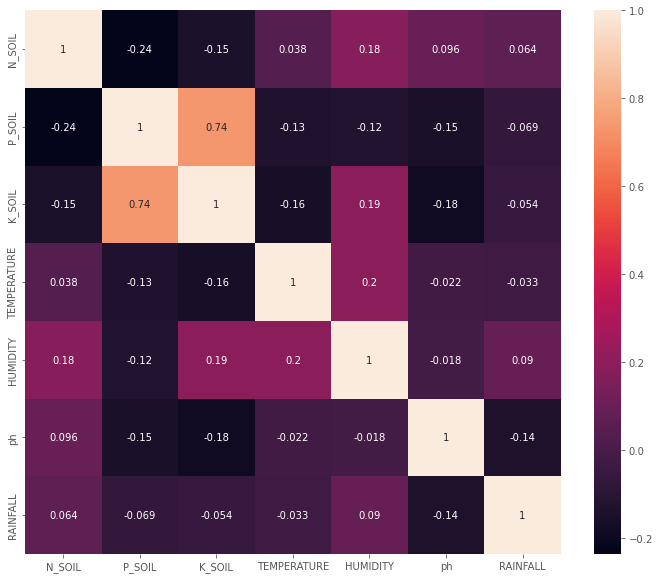

In [13]:
## check for multicollineraity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [14]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
## threshold--Domain expertise
corr_f=correlation(x_train,0.85)

In [16]:
## drop features when correlation is more than 0.85
x_train.drop(corr_f,axis=1,inplace=True)
x_test.drop(corr_f,axis=1,inplace=True)

In [17]:
x_train.columns

Index(['STATE', 'SOIL_TYPE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE',
       'HUMIDITY', 'ph', 'RAINFALL'],
      dtype='object')

In [18]:
# create column transformer with 3 types of transformer
cat_features=['STATE', 'SOIL_TYPE']
num_features=x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ],
    remainder='passthrough'
)


In [19]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['STATE', 'SOIL_TYPE']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL'],
      dtype='object'))])

In [20]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [21]:
pd.DataFrame(x_train)

,0
0,"(0, 9)\t1.0\n (0, 36)\t1.0\n (0, 39)\t-0.7..."
1,"(0, 12)\t1.0\n (0, 30)\t1.0\n (0, 39)\t-0...."
2,"(0, 22)\t1.0\n (0, 39)\t0.2714721813074163\..."
3,"(0, 9)\t1.0\n (0, 36)\t1.0\n (0, 39)\t-0.6..."
4,"(0, 22)\t1.0\n (0, 39)\t-1.3101794346047857..."
...,...
1645,"(0, 22)\t1.0\n (0, 39)\t-1.0957181985488937..."
1646,"(0, 17)\t1.0\n (0, 28)\t1.0\n (0, 39)\t1.5..."
1647,"(0, 17)\t1.0\n (0, 28)\t1.0\n (0, 39)\t-1...."
1648,"(0, 19)\t1.0\n (0, 31)\t1.0\n (0, 39)\t-1...."


# MODEL TRAINING

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [23]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

# Initialize LabelBinarizer to ensure consistency in classes
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)

# Binarize the output
y_train_binarized = label_binarizer.transform(y_train)
y_test_binarized = label_binarizer.transform(y_test)

models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(multi_class='ovr'),  # Add multi_class parameter for Logistic Regression
    "Decision Tree": DecisionTreeClassifier(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print('Accuracy:', model_train_accuracy)
    print('F1 score:', model_train_f1)
    print('Precision:', model_train_precision)
    print('Recall:', model_train_recall)
    print()
    print('Model performance for Testing set')
    print('Accuracy:', model_test_accuracy)
    print('F1 score:', model_test_f1)
    print('Precision:', model_test_precision)
    print('Recall:', model_test_recall)
    print('='*30)


C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest
Model performance for Training set
Accuracy: 1.0
F1 score: 1.0
Precision: 1.0
Recall: 1.0

Model performance for Testing set
Accuracy: 0.06545454545454546
F1 score: 0.050475288791957694
Precision: 0.048975672518067434
Recall: 0.06545454545454546


C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost
Model performance for Training set
Accuracy: 0.07636363636363637
F1 score: 0.027324479015846084
Precision: 0.05157741108122917
Recall: 0.07636363636363637

Model performance for Testing set
Accuracy: 0.04909090909090909
F1 score: 0.014764722354115686
Precision: 0.010864409325947788
Recall: 0.04909090909090909
Logistic Regression
Model performance for Training set
Accuracy: 0.14363636363636365
F1 score: 0.10758426936544326
Precision: 0.12901386677027785
Recall: 0.14363636363636365

Model performance for Testing set
Accuracy: 0.0890909090909091
F1 score: 0.05902023681829271
Precision: 0.057024692197240094
Recall: 0.0890909090909091
Decision Tree
Model performance for Training set
Accuracy: 1.0
F1 score: 1.0
Precision: 1.0
Recall: 1.0

Model performance for Testing set
Accuracy: 0.04181818181818182
F1 score: 0.03933172192679176
Precision: 0.039629721278058874
Recall: 0.04181818181818182


C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\jayvardhan\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set

In [24]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['STATE', 'SOIL_TYPE']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL'],
      dtype='object'))])

In [25]:
LR=LogisticRegression()

In [26]:
LR.fit(x_train, y_train)
    


C:\jayvardhan\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y=

In [28]:
import pickle
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))
pickle.dump(LR,open('model.pkl','wb'))

In [29]:
['STATE', 'SOIL_TYPE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE',
       'HUMIDITY', 'ph', 'RAINFALL']

['STATE',
 'SOIL_TYPE',
 'N_SOIL',
 'P_SOIL',
 'K_SOIL',
 'TEMPERATURE',
 'HUMIDITY',
 'ph',
 'RAINFALL']

In [30]:
y=['Gujarat','Sandy soil',2,3,4,5,6,7,5]

In [31]:
print("Columns expected by the preprocessor:", preprocessor.get_feature_names_out())
print("Columns in input_data_df:", input_data_df.columns)

Columns expected by the preprocessor: ['OneHotEncoder__STATE_Andhra Pradesh' 'OneHotEncoder__STATE_Assam'
 'OneHotEncoder__STATE_Chattisgarh' 'OneHotEncoder__STATE_Goa'
 'OneHotEncoder__STATE_Gujarat' 'OneHotEncoder__STATE_Haryana'
 'OneHotEncoder__STATE_Himachal Pradesh'
 'OneHotEncoder__STATE_Jammu and Kashmir' 'OneHotEncoder__STATE_Karnataka'
 'OneHotEncoder__STATE_Kerala' 'OneHotEncoder__STATE_Madhya Pradesh'
 'OneHotEncoder__STATE_Maharashtra' 'OneHotEncoder__STATE_Manipur'
 'OneHotEncoder__STATE_Meghalaya' 'OneHotEncoder__STATE_Nagaland'
 'OneHotEncoder__STATE_Odisha' 'OneHotEncoder__STATE_Pondicherry'
 'OneHotEncoder__STATE_Punjab' 'OneHotEncoder__STATE_Rajasthan'
 'OneHotEncoder__STATE_Tamil Nadu' 'OneHotEncoder__STATE_Telangana'
 'OneHotEncoder__STATE_Tripura' 'OneHotEncoder__STATE_Uttar Pradesh'
 'OneHotEncoder__STATE_Uttrakhand' 'OneHotEncoder__STATE_West Bengal'
 'OneHotEncoder__SOIL_TYPE_Black soil'
 'OneHotEncoder__SOIL_TYPE_Clayey soils'
 'OneHotEncoder__SOIL_TYPE_Delta 

NameError: name 'input_data_df' is not defined

In [33]:
import pandas as pd
import numpy as np
import pickle

# Load preprocessor and model
with open('preprocessor.pkl', 'rb') as preprocessor_file:
    preprocessor = pickle.load(preprocessor_file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example feature values for a single sample
input_data = np.array([['Gujarat', 'Sandy soil', 5, 10, 20, 30, 60, 6.5, 120]])  # Replace with actual values

# Column names should match those used in your model
column_names = ['STATE', 'SOIL_TYPE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE',
                'HUMIDITY', 'ph', 'RAINFALL']

# Create DataFrame with the input data
input_data_df = pd.DataFrame(input_data, columns=column_names)

# Transform the input data
processed_data = preprocessor.transform(input_data_df)

# Make predictions
predictions = model.predict(processed_data)

# Output the predictions
print("Predictions:", predictions)


Predictions: [13]


In [175]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [176]:
## threshold--Domain expertise
corr_f=correlation(x_train,0.85)

In [177]:
## drop features when correlation is more than 0.85
x_train.drop(corr_f,axis=1,inplace=True)
x_test.drop(corr_f,axis=1,inplace=True)

In [178]:
## getting all different of features
num_features= [feature for feature in df.columns if df[feature].dtype!='O']
print('Num of numerical features:',len(num_features))
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical features:',len(cat_features))
discreate_features=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print('Num of discreate featuresL:',len(discreate_features))
continuous_features=[feature for feature in num_features if feature not in discreate_features]
print('Num of continuous featuresL:',len(continuous_features))

Num of numerical features: 8
Num of categorical features: 3
Num of discreate featuresL: 0
Num of continuous featuresL: 8


In [179]:
cat_features

['STATE', 'SOIL_TYPE', 'CROP']

In [ ]:
# create column transformer with 3 types of transformer
cat_features=['seller_type','fuel_type','transmission_type']
num_features=x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ],
    remainder='passthrough'
)

In [132]:
df.head()

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,7.628473,262.717340,120000,Black pepper


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        2200 non-null   object 
 1   SOIL_TYPE    2200 non-null   object 
 2   N_SOIL       2200 non-null   int64  
 3   P_SOIL       2200 non-null   int64  
 4   K_SOIL       2200 non-null   int64  
 5   TEMPERATURE  2200 non-null   float64
 6   ph           2200 non-null   float64
 7   RAINFALL     2200 non-null   float64
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 172.0+ KB


In [134]:
df.isnull().sum()

STATE          0
SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64

In [135]:
df.duplicated().sum()

0

In [136]:
df.shape

(2200, 10)

In [137]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,9.935091,298.560117,120000.000000


In [138]:
df.drop('N_SOIL', axis=1,inplace=True)

In [139]:
df.drop('P_SOIL', axis=1,inplace=True)

In [140]:
df.drop('K_SOIL', axis=1,inplace=True)

In [141]:
df.head()

,STATE,SOIL_TYPE,TEMPERATURE,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,20.879744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,21.770462,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,23.004459,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,26.491096,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,20.130175,7.628473,262.717340,120000,Black pepper


In [142]:
len(df['STATE'].unique())

26

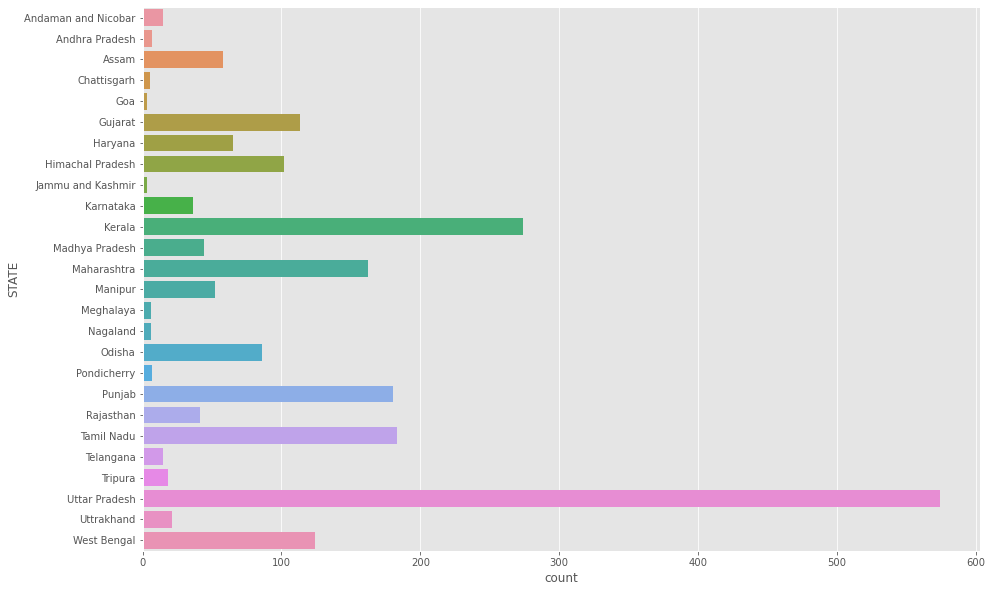

In [143]:
plt.figure(figsize=(15,10))
sns.countplot(y=df["STATE"])
plt.show()

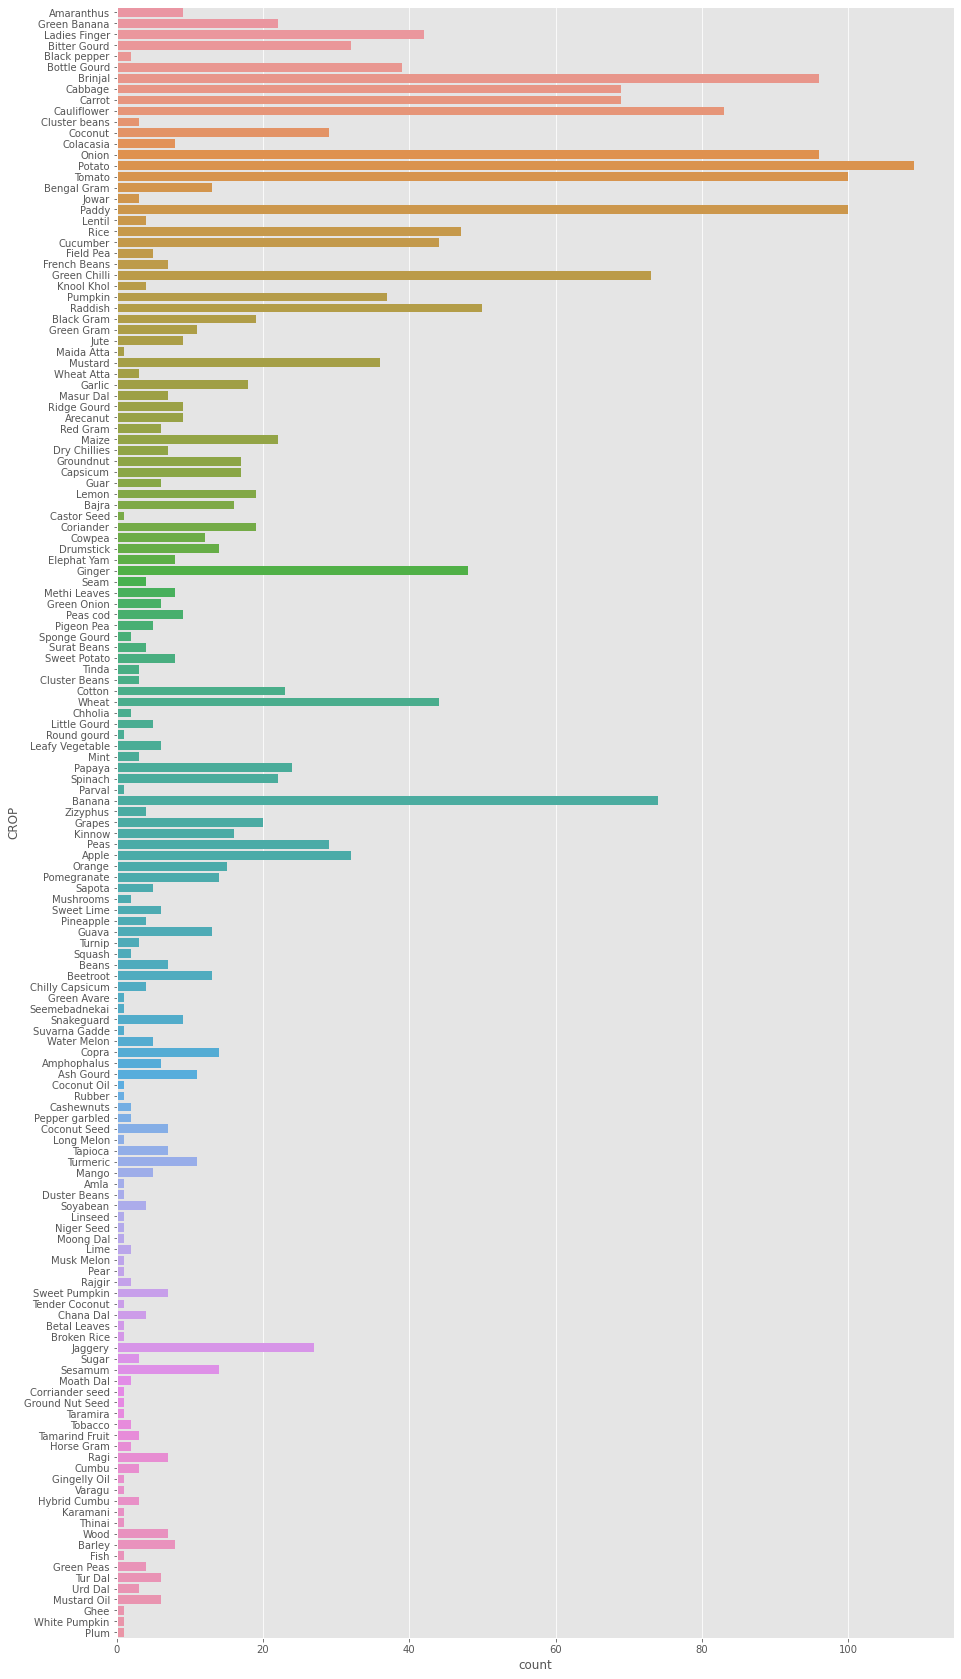

In [144]:
plt.figure(figsize=(15,30))
sns.countplot(y=df["CROP"])
plt.show()

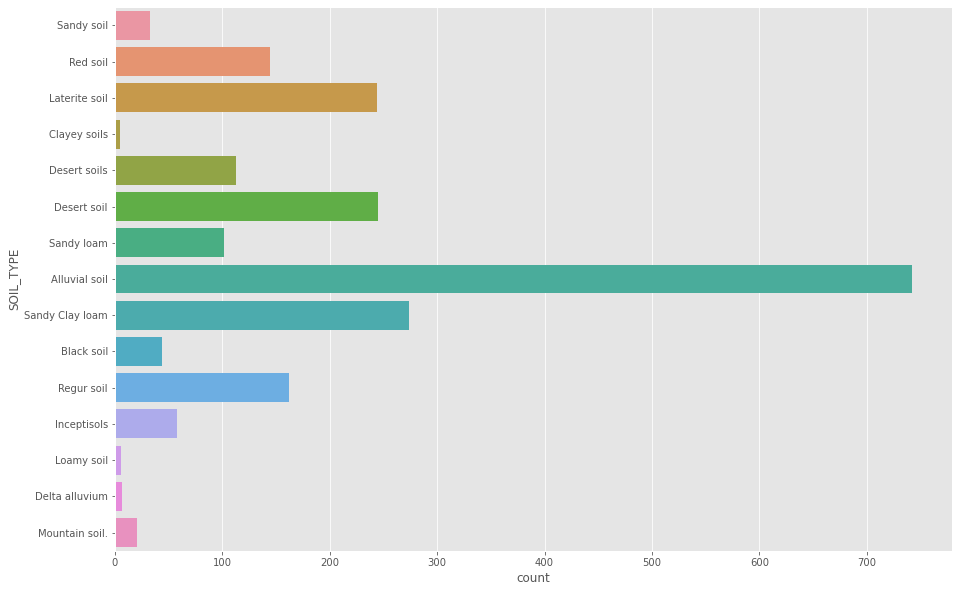

In [145]:
plt.figure(figsize=(15,10))
sns.countplot(y=df["SOIL_TYPE"])
plt.show()

In [146]:
st = df["STATE"].unique()
yield_per_st = []
for state in  st:
    yield_per_st.append(df[df['STATE'] == state]["CROP"].sum())

In [147]:
df['CROP'].sum()

'AmaranthusGreen BananaLadies FingerBitter GourdBlack pepperBottle GourdBrinjalCabbageCarrotCauliflowerCluster beansCoconutColacasiaOnionPotatoTomatoTomatoTomatoBengal GramJowarPaddyPaddyLentilRiceRiceBitter GourdBottle GourdBrinjalCabbageCarrotCauliflowerCluster beansCucumberField PeaFrench BeansGreen ChilliKnool KholPotatoPumpkinRaddishTomatoBlack GramGreen GramJuteMaida AttaMustardRiceRiceWheat AttaGarlicGreen GramMasur DalOnionPotatoRiceWheat AttaBitter GourdBrinjalCabbageCarrotCauliflowerCucumberGarlicGreen ChilliOnionPotatoPumpkinRaddishRidge GourdTomatoArecanutRed GramBrinjalCabbageGreen ChilliJuteMaizeMustardRiceRiceDry ChilliesPaddyPaddyPaddyGroundnutArecanutArecanutArecanutLadies FingerBrinjalCapsicumGuarLemonBajraBajraCastor SeedLadies FingerBottle GourdBrinjalCabbageCapsicumCarrotCauliflowerCorianderCowpeaCucumberDrumstickElephat YamGingerGreen ChilliSeamLemonMethi LeavesGreen OnionPeas codPigeon PeaSponge GourdSurat BeansSweet PotatoTindaTomatoCluster BeansPotatoSweet Pota

In [148]:
df.columns


Index(['STATE', 'SOIL_TYPE', 'TEMPERATURE', 'ph', 'RAINFALL', 'CROP_PRICE',
       'CROP'],
      dtype='object')

<AxesSubplot:>

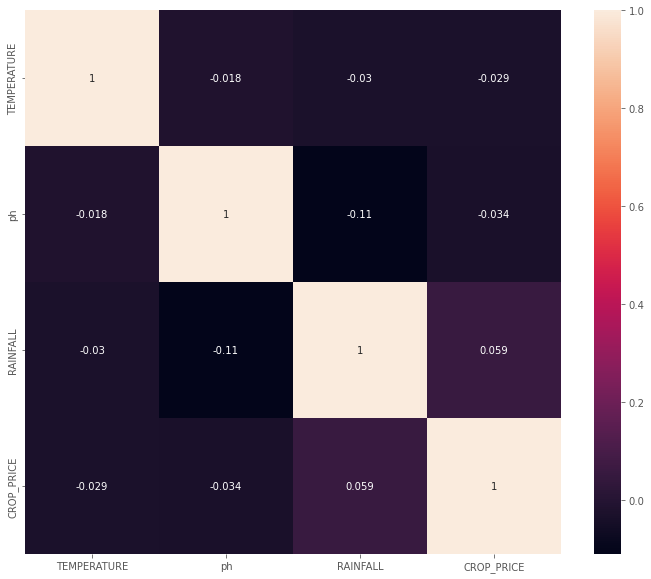

In [163]:
## check for multicollineraity
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [149]:
col= ['STATE', 'SOIL_TYPE', 'TEMPERATURE', 'ph', 'RAINFALL', 'CROP_PRICE',
       'CROP']

In [150]:
## getting all different of features
num_features= [feature for feature in df.columns if df[feature].dtype!='O']
print('Num of numerical features:',len(num_features))
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical features:',len(cat_features))
discreate_features=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print('Num of discreate featuresL:',len(discreate_features))
continuous_features=[feature for feature in num_features if feature not in discreate_features]
print('Num of continuous featuresL:',len(continuous_features))

Num of numerical features: 4
Num of categorical features: 3
Num of discreate featuresL: 0
Num of continuous featuresL: 4


In [151]:
features=df[['STATE', 'SOIL_TYPE', 'TEMPERATURE', 'ph', 'RAINFALL']]
target=df[['CROP_PRICE', 'CROP']]

In [152]:
num_features

['TEMPERATURE', 'ph', 'RAINFALL', 'CROP_PRICE']

In [153]:
cat_features

['STATE', 'SOIL_TYPE', 'CROP']

In [154]:
continuous_features

['TEMPERATURE', 'ph', 'RAINFALL', 'CROP_PRICE']

In [155]:
from sklearn.model_selection import train_test_split
x=df.drop(['CROP','CROP_PRICE'],axis=1)
y=df[['CROP','CROP_PRICE']]

In [156]:
# create column transformer with 3 types of transformer
cat_features=['STATE', 'SOIL_TYPE']
num_features=['TEMPERATURE', 'ph', 'RAINFALL']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ],
    remainder='passthrough'
)

In [157]:
x_scaled=preprocessor.fit_transform(x)

In [159]:
pd.DataFrame(x_scaled)

,0
0,"(0, 38)\t1.0\n (0, 39)\t-0.9355869259076098..."
1,"(0, 38)\t1.0\n (0, 39)\t-0.7596460261263331..."
2,"(0, 38)\t1.0\n (0, 39)\t-0.5158981414813986..."
3,"(0, 38)\t1.0\n (0, 39)\t0.1728070378828599\..."
4,"(0, 38)\t1.0\n (0, 39)\t-1.08364706156879\n..."
...,...
2195,"(0, 24)\t1.0\n (0, 39)\t0.22881400336573957..."
2196,"(0, 24)\t1.0\n (0, 39)\t0.3557202575419997\..."
2197,"(0, 24)\t1.0\n (0, 39)\t-0.2932184333073158..."
2198,"(0, 24)\t1.0\n (0, 39)\t0.12961222633844158..."


In [160]:
## separate train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1760, 5), (440, 5))

ValueError: setting an array element with a sequence.

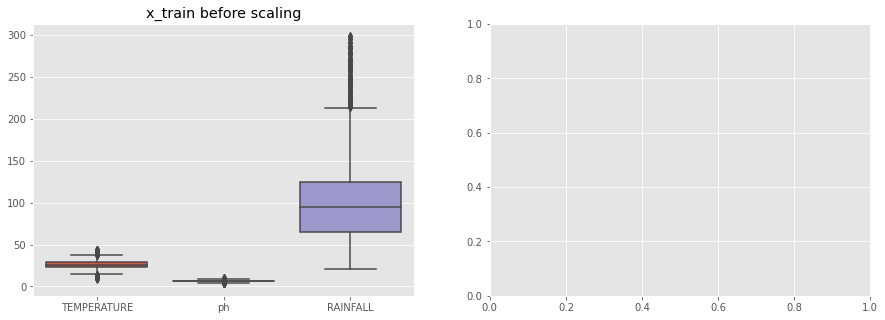

(2200, 6)

(2200,)

In [80]:
y.head()

0      7000
1      5000
2      7000
3      7000
4    120000
Name: CROP_PRICE, dtype: int64

(2200, 6)

(2200,)

ValueError: input_features is not equal to feature_names_in_

In [62]:
from sklearn.linear_model import LinearRegression, Lasso , Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , r2_score

In [70]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree' : DecisionTreeRegressor(),
    'KNN' : KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(x_train_dummy, y_train)
    y_pred = md.predict(x_test_dummy)
    print(mean_absolute_error(y_test,y_pred))
    print(r2_score(y_test,y_pred))

ValueError: could not convert string to float: 'Kerala'

In [71]:
#Predictive System

In [76]:
def prediction(STATE, SOIL_TYPE, TEMPERATURE, ph, RAINFALL, CROP_PRICE,CROP):
    features = np.array([[STATE, SOIL_TYPE, TEMPERATURE, ph, RAINFALL, CROP_PRICE,CROP]], dtype=object)
    transform_features = preprocesser.transform(features)
    predicted_crop_price = dtr.predict(transform_features).reshape(-1,1)
    return predicted_crop_price[0][0]

In [73]:
df.head()

,STATE,SOIL_TYPE,TEMPERATURE,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,20.879744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,21.770462,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,23.004459,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,26.491096,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,20.130175,7.628473,262.717340,120000,Black pepper


In [79]:
result = prediction("Andaman and Nicobar", "Sandy soil",20.879744,6.502985,202.935536,7000)

TypeError: prediction() missing 1 required positional argument: 'CROP'